### <CENTER>ML ZOOMCAMP 2025 </CENTER>
### <CENTER>03 CLASSIFICATION - Homework</CENTER>
### <CENTER>ANGOLE DANIEL</CENTER>

#### Dataset

In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from here.

Or you can do it with wget:

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

In this dataset our desired target for classification task will be converted variable - has the client signed up to the platform or not.

#### Data preparation

- Check if the missing values are presented in the features.
- If there are missing values:
    - For caterogiral features, replace them with 'NA'
    - For numerical features, replace with with 0.0

In [ ]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

In [1]:
# Importing Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('course_lead_scoring.csv')
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [3]:
df.isna().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [4]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [5]:
categorical_features = ['lead_source', 'industry', 'employment_status', 'location']
numerical_features = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

In [6]:
df[categorical_features] = df[categorical_features].fillna("NA")
df[numerical_features] = df[numerical_features].fillna(0.0)

In [7]:
df.isna().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

<b>Question 1</b>

What is the most frequent observation (mode) for the column industry?
- NA
- technology
- healthcare
- retail

In [8]:
df['industry'].mode()

0    retail
Name: industry, dtype: object

<b>Question 2</b>

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?
- interaction_count and lead_score
- number_of_courses_viewed and lead_score
- number_of_courses_viewed and interaction_count
- annual_income and interaction_count

Only consider the pairs above when answering this question.

<b>Split the data</b>

- Split your data in train/val/test sets with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value y is not in your dataframe.

In [9]:
df[numerical_features].corrwith(df.number_of_courses_viewed).abs()

number_of_courses_viewed    1.000000
annual_income               0.009770
interaction_count           0.023565
lead_score                  0.004879
dtype: float64

In [10]:
df[numerical_features].corrwith(df.annual_income).abs()

number_of_courses_viewed    0.009770
annual_income               1.000000
interaction_count           0.027036
lead_score                  0.015610
dtype: float64

In [11]:
df[numerical_features].corrwith(df.interaction_count).abs()

number_of_courses_viewed    0.023565
annual_income               0.027036
interaction_count           1.000000
lead_score                  0.009888
dtype: float64

In [12]:
df[numerical_features].corrwith(df.lead_score).abs()

number_of_courses_viewed    0.004879
annual_income               0.015610
interaction_count           0.009888
lead_score                  1.000000
dtype: float64

In [13]:
df[numerical_features].corrwith(df.lead_score).abs()

number_of_courses_viewed    0.004879
annual_income               0.015610
interaction_count           0.009888
lead_score                  1.000000
dtype: float64

In [14]:
df[numerical_features].corrwith(df.converted).abs()

number_of_courses_viewed    0.435914
annual_income               0.053131
interaction_count           0.374573
lead_score                  0.193673
dtype: float64

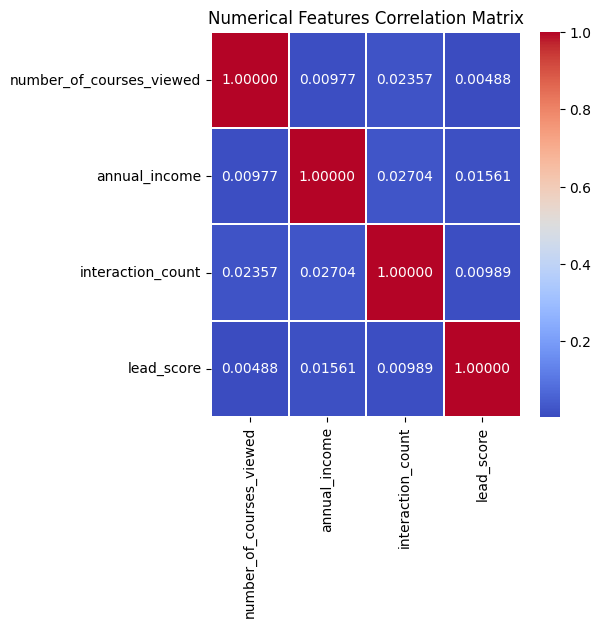

In [15]:
corr_matrix = df[numerical_features].corr().abs()

plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".5f", cmap="coolwarm", linewidths=0.1)
plt.title("Numerical Features Correlation Matrix")
plt.show()

In [16]:
df_full_train, df_test = train_test_split(df, test_size= 0.2, random_state= 42)
df_train, df_val = train_test_split(df_full_train, test_size= 0.25, random_state= 42)
df_train = df_train.reset_index(drop= True)
df_test = df_test.reset_index(drop= True)
df_val = df_val.reset_index(drop= True)
y_train = df_train.converted.values
y_test = df_test.converted.values
y_val = df_val.converted.values
del df_train["converted"]
del df_test["converted"]
del df_val["converted"]

<b>Question 3</b>

- Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.
- Round the scores to 2 decimals using round(score, 2).

Which of these variables has the biggest mutual information score?
- industry
- location
- lead_source
- employment_status

In [17]:
def mutual_info(series):
    return mutual_info_score(series, y_train)

In [18]:
mi = df_train[categorical_features].apply(mutual_info)
mi.sort_values(ascending= False)

lead_source          0.035396
employment_status    0.012938
industry             0.011575
location             0.004464
dtype: float64

<b>Question 4</b>

- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?
- 0.64
- 0.74
- 0.84
- 0.94

In [19]:
train_dict = df_train[categorical_features + numerical_features].to_dict(orient= "records")

In [20]:
dv = DictVectorizer(sparse= False)

In [21]:
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical_features + numerical_features].to_dict(orient= "records")
X_val = dv.transform(val_dict)

In [22]:
dv.get_feature_names_out()

array(['annual_income', 'employment_status=NA',
       'employment_status=employed', 'employment_status=self_employed',
       'employment_status=student', 'employment_status=unemployed',
       'industry=NA', 'industry=education', 'industry=finance',
       'industry=healthcare', 'industry=manufacturing', 'industry=other',
       'industry=retail', 'industry=technology', 'interaction_count',
       'lead_score', 'lead_source=NA', 'lead_source=events',
       'lead_source=organic_search', 'lead_source=paid_ads',
       'lead_source=referral', 'lead_source=social_media', 'location=NA',
       'location=africa', 'location=asia', 'location=australia',
       'location=europe', 'location=middle_east',
       'location=north_america', 'location=south_america',
       'number_of_courses_viewed'], dtype=object)

In [23]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [24]:
y_predict = model.predict_proba(X_val)[:, 1]

convert = (y_predict >= 0.5)

(y_val == convert).mean()

np.float64(0.6996587030716723)

In [25]:
y_pred = model.predict(X_train)
accuracy = (y_train == y_pred).mean().round(2)
print("Accuracy:", accuracy)

Accuracy: 0.74


<b>Question 5</b>

- Let's find the least useful feature using the feature elimination technique.
- Train a model using the same features and parameters as in Q4 (without rounding).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

- 'industry'
- 'employment_status'
- 'lead_score'

Note: The difference doesn't have to be positive.

In [26]:
full_train_dict = df_full_train[categorical_features + numerical_features].to_dict(orient= "records")
dv = DictVectorizer(sparse= False)
X_full_train = dv.fit_transform(full_train_dict)

y_full_train = df_full_train.converted.values

In [27]:
model_2 = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model_2.fit(X_full_train, y_full_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [28]:
test_dict = df_test[categorical_features + numerical_features].to_dict(orient= "records")

X_test = dv.transform(test_dict)

y_predictions = model_2.predict_proba(X_test)[:, 1]

decision = (y_predictions >= 0.5)

(decision == y_test).mean()

np.float64(0.7372013651877133)

In [29]:
# Base feature list
all_features = categorical_features + numerical_features

# 2. Compute baseline accuracy
train_dict = df_train[all_features].to_dict(orient="records")
X_base_train = dv.fit_transform(train_dict)
y_base_train = y_train

# test_dict = df_test[all_features].to_dict(orient="records")
# X_test = dv.transform(test_dict)
# y_test = y_test

val_dict = df_val[all_features].to_dict(orient="records")
X_val = dv.transform(val_dict)
y_val = y_val

# Train base model
model_base = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model_base.fit(X_base_train, y_base_train)

# Baseline accuracy
y_pred_base = model_base.predict_proba(X_val)[:, 1]
decision_base = (y_pred_base >= 0.5)
baseline_accuracy = (decision_base == y_val).mean()

print("Baseline Accuracy:", baseline_accuracy)

Baseline Accuracy: 0.6996587030716723


In [30]:
feature_diff = {}

for feature in categorical_features:
    reduced_features = [f for f in all_features if f != feature]
    
    train_dict = df_train[reduced_features].to_dict(orient="records")
    X_train_reduced = dv.fit_transform(train_dict)
    
    test_dict = df_test[reduced_features].to_dict(orient="records")
    X_test_reduced = dv.transform(test_dict)
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train_reduced, y_base_train)
    
    y_pred = model.predict_proba(X_test_reduced)[:, 1]
    decision = (y_pred >= 0.5)
    acc = (decision == y_val).mean()
    
    feature_diff[feature] = baseline_accuracy - acc
    print(f"{feature}: {acc:.4f}  (Δ = {feature_diff[feature]:.6f})")

least_useful = min(feature_diff, key=feature_diff.get)
print(f"\nLeast useful categorical feature: {least_useful}")

lead_source: 0.5597  (Δ = 0.139932)
industry: 0.5529  (Δ = 0.146758)
employment_status: 0.5495  (Δ = 0.150171)
location: 0.5495  (Δ = 0.150171)

Least useful categorical feature: lead_source


<b>Question 6</b>

- Now let's train a regularized logistic regression.
- Let's try the following values of the parameter C: [0.01, 0.1, 1, 10, 100].
- Train models using all the features as in Q4.
- Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these C leads to the best accuracy on the validation set?
- 0.01
- 0.1
- 1
- 10
- 100

Note: If there are multiple options, select the smallest C.

In [31]:
C_values = [0.01, 0.1, 1, 10, 100]
accuracies = {}

for C in C_values:
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    
    # Train on all features (same as Q4)
    model.fit(X_full_train, y_full_train)
    
    # Predict on validation set
    y_pred = model.predict_proba(X_val)[:, 1]
    decision = (y_pred >= 0.5)
    
    acc = (decision == y_val).mean()
    accuracies[C] = round(acc, 3)
    
    print(f"C={C}: Validation Accuracy = {accuracies[C]}")

C=0.01: Validation Accuracy = 0.706
C=0.1: Validation Accuracy = 0.717
C=1: Validation Accuracy = 0.717
C=10: Validation Accuracy = 0.717
C=100: Validation Accuracy = 0.717
